In [76]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline


In [77]:
# Load .env enviroment variables
load_dotenv("Api_key.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [78]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [79]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [80]:
# Fetch current BTC price
btc_px = requests.get(btc_url).json()['data']['1']['quotes']['USD']['price']


# Fetch current ETH price
eth_px = requests.get(eth_url).json()['data']['1027']['quotes']['USD']['price']



# Compute current value of my crpto
my_btc_value = my_btc * btc_px
my_eth_value = my_eth * eth_px


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $59895.60
The current value of your 5.3 ETH is $12098.57


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [81]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [82]:
# Set Alpaca API key and secret
#load_dotenv('example.env')
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [83]:
# Format current date as ISO format
today = pd.Timestamp(str(date.today() - timedelta(days=1)), tz="America/New_York").isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                     SPY  \
                             open   high     low   close   volume    open   
time                                                                        
2021-04-22 00:00:00-04:00  114.74  114.8  114.59  114.77  3518947  415.88   

                                                            
                             high     low  close    volume  
time                                                        
2021-04-22 00:00:00-04:00  416.78  411.13  412.3  90086341

In [84]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio['AGG']['close'][0]
spy_close_price = df_portfolio['SPY']['close'][0]


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.77
Current SPY closing price: $412.3


In [87]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price



# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20615.00
The current value of your 200 AGG shares is $22954.00


### Savings Health Analysis

In [88]:
# Set monthly household income
monthly_income = 12000


# Create savings DataFrame
crypto_value = my_btc_value + my_eth_value
share_value = my_spy_value + my_agg_value
df_savings = pd.DataFrame({'amount': [crypto_value, share_value]}, index=['crypto', 'shares'])


# Display savings DataFrame
display(df_savings)

,amount
crypto,71994.175
shares,43569.000


<AxesSubplot:title={'center':'Personal saving portfolio'}, ylabel='amount'>

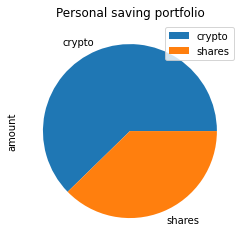

In [130]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Personal saving portfolio")

In [91]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value + share_value

# Calculate value difference
delta = emergency_fund - total_savings

# Validate saving health
if (total_savings > emergency_fund):
    print("Kudos for having enough money in this fund!")
elif (total_savings == emergency_fund):
    print("Kudos on reaching this financial goal!")
else:
    print(f"You are ${delta} away from reaching the goal!")

Kudos for having enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [93]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [94]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2016-08-17 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145.0  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224.0  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907.0  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207.0

In [95]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [96]:
# Printing the simulation input data
MC_30yr.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-08-18 00:00:00-04:00     0.001110  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   

                                                    
                               volume daily_return  
time                                                
2016-08-17 00:00:00-04:00         NaN          NaN  
2016-08-18 00:00:00-04:00  42850145.0          NaN  
2016-08-19 00:00:00-04:00  52238224.0    -0.001371  
2016-08-22 00:00:00-04:00  48628907.0    -0.000320  
2016-08-23 00:00:00-04:00  41981207.0     0.002014

In [97]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996697,0.997820,1.008494,1.001843,0.999051,0.993873,1.000271,1.001595,1.008294,0.997834,...,0.995541,0.993303,0.996954,0.999542,1.004882,1.006625,0.994203,0.993099,1.002392,0.994269
2,0.997288,1.003295,1.002672,1.007507,0.998899,0.991493,1.005302,1.007401,1.017372,1.006808,...,0.994960,0.985720,0.998083,0.996877,1.003049,0.999927,0.995877,0.993617,1.006345,0.994300
3,1.000752,1.003850,1.000380,1.007440,0.999602,0.986298,0.999450,1.014643,1.015838,1.006645,...,0.989201,0.986790,1.008211,1.000274,0.998462,1.007437,1.000144,0.998670,1.012324,0.998178
4,0.999708,1.000431,0.995310,1.001713,1.001091,0.983639,0.989158,1.024929,1.017611,1.001150,...,0.996907,0.989136,1.007603,1.005666,1.000551,1.017854,0.999976,0.992920,1.005985,1.002876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.472533,4.275972,3.967438,13.426391,7.447106,5.725134,10.665490,7.610765,1.926348,11.197924,...,4.116015,8.547935,8.029595,2.751564,9.598775,5.034755,4.740093,7.742318,8.362808,4.764146
7557,3.481587,4.283385,3.996712,13.550615,7.502624,5.700163,10.542334,7.557027,1.928715,11.310664,...,4.127811,8.492302,8.075202,2.758589,9.460819,5.049863,4.739538,7.765021,8.360141,4.812421
7558,3.464025,4.324662,4.010916,13.451788,7.542210,5.670626,10.517123,7.523342,1.906722,11.270467,...,4.137809,8.502703,8.024854,2.745711,9.477284,5.047296,4.730252,7.740597,8.316193,4.839705
7559,3.506610,4.301504,4.021173,13.492672,7.534835,5.643220,10.525527,7.584204,1.903837,11.383071,...,4.140265,8.429115,7.979709,2.757054,9.541094,5.038653,4.736911,7.755893,8.355068,4.839850


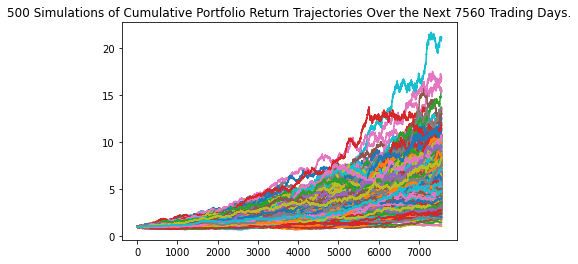

In [112]:
# Plot simulation outcomes
line_plot = MC_30yr.plot_simulation()


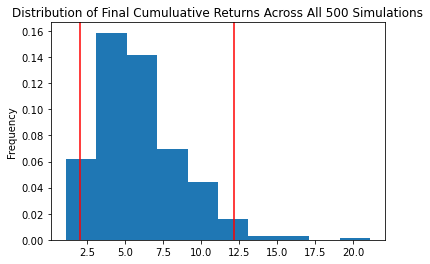

In [113]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30yr.plot_distribution()


### Retirement Analysis

In [101]:
# Fetch summary statistics from the Monte Carlo simulation results
retirement_analysis = MC_30yr.summarize_cumulative_return()


# Print summary statistics
print(retirement_analysis)

count           500.000000
mean              5.941118
std               2.760878
min               1.076791
25%               3.947376
50%               5.378920
75%               7.422987
max              21.100915
95% CI Lower      2.018652
95% CI Upper     12.169456
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [114]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(retirement_analysis[8]*initial_investment,2)
ci_upper = round(retirement_analysis[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $40373.04 and $243389.13


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [115]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(retirement_analysis[8]*initial_investment,2)
ci_upper = round(retirement_analysis[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $60559.56 and $365083.69


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [116]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.95,.05],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [117]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999834,0.998780,1.005717,1.007635,0.999919,0.996905,0.998127,0.996650,1.000003,1.000225,...,0.999496,1.005096,0.994508,1.007112,1.001944,0.998814,1.002047,1.005353,0.997810,1.002557
2,1.003860,1.001136,1.003829,1.006616,0.997302,0.998672,0.997261,1.001547,0.997521,1.000303,...,0.999770,1.001072,0.989802,1.004105,0.998690,1.001236,1.004600,1.009487,0.994792,1.002459
3,1.004681,1.000007,1.004125,1.005640,0.996444,0.995646,0.992309,0.997220,1.000606,0.999742,...,0.994511,1.004362,0.990459,1.006941,0.995540,1.002897,1.002364,1.013973,0.995455,1.004638
4,1.005968,0.999331,1.011187,1.009898,1.000724,0.996561,0.995017,1.000363,0.999760,0.999296,...,0.998183,0.999705,0.990536,1.003677,0.994518,1.006114,0.997207,1.007966,0.999184,0.998203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.045386,1.098997,0.929975,1.170345,1.029694,0.919424,1.152929,1.273373,1.244250,1.055549,...,0.838341,1.016960,1.142172,1.110116,1.223317,1.035385,0.910163,1.063094,1.201471,1.103975
1257,1.042833,1.095014,0.930241,1.167089,1.029819,0.919091,1.152313,1.274940,1.243750,1.052877,...,0.838067,1.020884,1.141957,1.113179,1.227167,1.038298,0.906120,1.056984,1.200930,1.103387
1258,1.044588,1.098319,0.930456,1.167983,1.032566,0.918463,1.158445,1.276160,1.248234,1.055220,...,0.843486,1.024421,1.135558,1.115839,1.234428,1.037123,0.904811,1.053322,1.205797,1.101386
1259,1.043743,1.098797,0.933999,1.166016,1.028292,0.921327,1.156368,1.288662,1.251675,1.056252,...,0.845195,1.024363,1.138544,1.116197,1.233064,1.035872,0.904237,1.052774,1.203030,1.103914


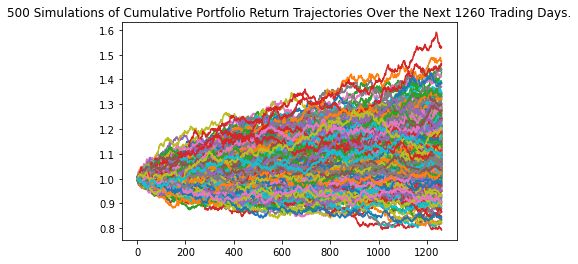

In [118]:
# Plot simulation outcomes
line_plot = MC_5yr.plot_simulation()

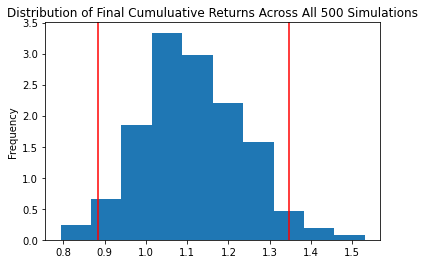

In [119]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5yr.plot_distribution()

In [122]:
# Fetch summary statistics from the Monte Carlo simulation results
retirement_analysis = MC_5yr.summarize_cumulative_return()

# Print summary statistics
print(retirement_analysis)

count           500.000000
mean              1.113881
std               0.121714
min               0.793311
25%               1.031797
50%               1.107131
75%               1.193400
max               1.530715
95% CI Lower      0.885090
95% CI Upper      1.346221
Name: 1260, dtype: float64


In [123]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = round(retirement_analysis[8]*initial_investment,2)
ci_upper = round(retirement_analysis[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53105.37 and $80773.28


### Ten Years Retirement Option

In [124]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.95,.05],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [125]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002631,1.002418,1.003977,1.003472,0.992818,1.004348,1.002717,0.998082,0.999909,1.003882,...,0.991872,0.995724,1.002452,1.004334,1.004204,0.999867,1.000177,0.994842,0.998836,0.998371
2,1.007914,1.002217,1.000009,1.001364,0.992383,1.002887,1.004145,0.995279,0.998726,1.009758,...,0.989829,0.999451,1.003358,1.002232,1.009467,0.996720,1.001014,0.991788,0.998339,0.999068
3,1.009303,0.999764,1.001004,1.000911,0.992941,1.004732,1.001318,0.997182,0.997230,1.010756,...,0.996305,1.000995,1.005061,0.999955,1.010675,1.002056,0.992656,0.991855,0.995373,0.998832
4,1.011232,0.995035,0.997020,1.005009,0.993144,1.003997,0.998973,0.998272,1.000449,1.007865,...,1.001083,1.009113,1.007352,0.997880,1.010132,1.002477,0.987732,0.992222,0.991630,0.995260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.733183,1.319671,1.323577,1.365456,1.185029,1.030555,0.927278,1.180758,1.368262,1.530823,...,1.129214,1.231698,1.068866,1.520703,1.273785,1.108523,1.604455,1.250229,0.975128,1.326975
2517,1.735808,1.321078,1.321293,1.369792,1.181911,1.028689,0.926998,1.183574,1.372570,1.528419,...,1.132072,1.229109,1.066878,1.515983,1.272939,1.106996,1.614792,1.249030,0.974759,1.331259
2518,1.742414,1.320983,1.317981,1.371407,1.188022,1.024073,0.927412,1.174318,1.379632,1.523738,...,1.135366,1.228445,1.069492,1.521576,1.268929,1.104726,1.620576,1.244680,0.975601,1.332192
2519,1.753597,1.324250,1.317806,1.370458,1.185535,1.021658,0.926847,1.174682,1.384488,1.521547,...,1.130956,1.232460,1.072573,1.525398,1.263330,1.107557,1.616019,1.247811,0.976831,1.336285


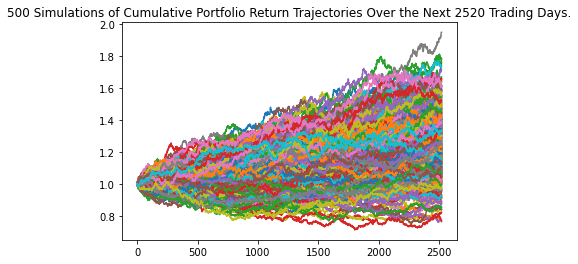

In [126]:
# Plot simulation outcomes
line_plot = MC_10yr.plot_simulation()

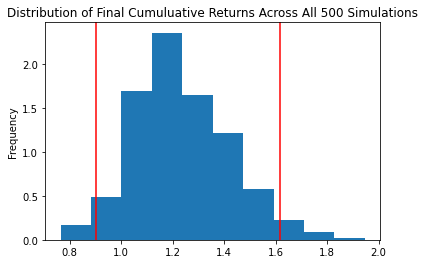

In [127]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10yr.plot_distribution()


In [128]:
# Fetch summary statistics from the Monte Carlo simulation results
retirement_analysis = MC_10yr.summarize_cumulative_return()

# Print summary statistics
print(retirement_analysis)

count           500.000000
mean              1.236517
std               0.187239
min               0.764946
25%               1.105232
50%               1.212224
75%               1.355871
max               1.946371
95% CI Lower      0.900837
95% CI Upper      1.615105
Name: 2520, dtype: float64


In [129]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = round(retirement_analysis[8]*initial_investment,2)
ci_upper = round(retirement_analysis[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

NameError: name 'ci_lower_ten' is not defined